# CMSE 402 Homework02
### Mikel Good
### 2/19/2026

In [1]:
# imports
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# data
death_data = pd.read_csv("data_files/leading_cause_death.csv")
states = gpd.read_file("data_files/tl_2020_us_state.shp")
beers = pd.read_csv("data_files/beers.csv")
breweries = pd.read_csv("data_files/breweries.csv")

## Part 1a

In [3]:
death_data_hom = death_data[death_data["CAUSE_NAME"] == "Homicide"]
death_data_hom["YEAR"] = pd.to_numeric(death_data_hom["YEAR"])
death_data_hom_2013 = death_data_hom[death_data_hom["YEAR"] == 2013]
death_data_hom_2013["DEATHS"] = pd.to_numeric(death_data_hom_2013["DEATHS"])

/tmp/ipykernel_1724055/1783143172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_data_hom["YEAR"] = pd.to_numeric(death_data_hom["YEAR"])
/tmp/ipykernel_1724055/1783143172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_data_hom_2013["DEATHS"] = pd.to_numeric(death_data_hom_2013["DEATHS"])


In [4]:
valid_states = death_data_hom_2013["STATE"].unique()
states_filtered = states[states["NAME"].isin(valid_states)]

In [5]:
death_data_hom_2013 = death_data_hom_2013.sort_values(by="STATE")
states_filtered = states_filtered.sort_values(by="NAME")
merged = states_filtered.merge(death_data_hom_2013[["STATE", "DEATHS"]],
                               left_on="NAME",
                               right_on="STATE",
                               how="left"
)
cont = merged[~merged["STUSPS"].isin(["AK", "HI"])]

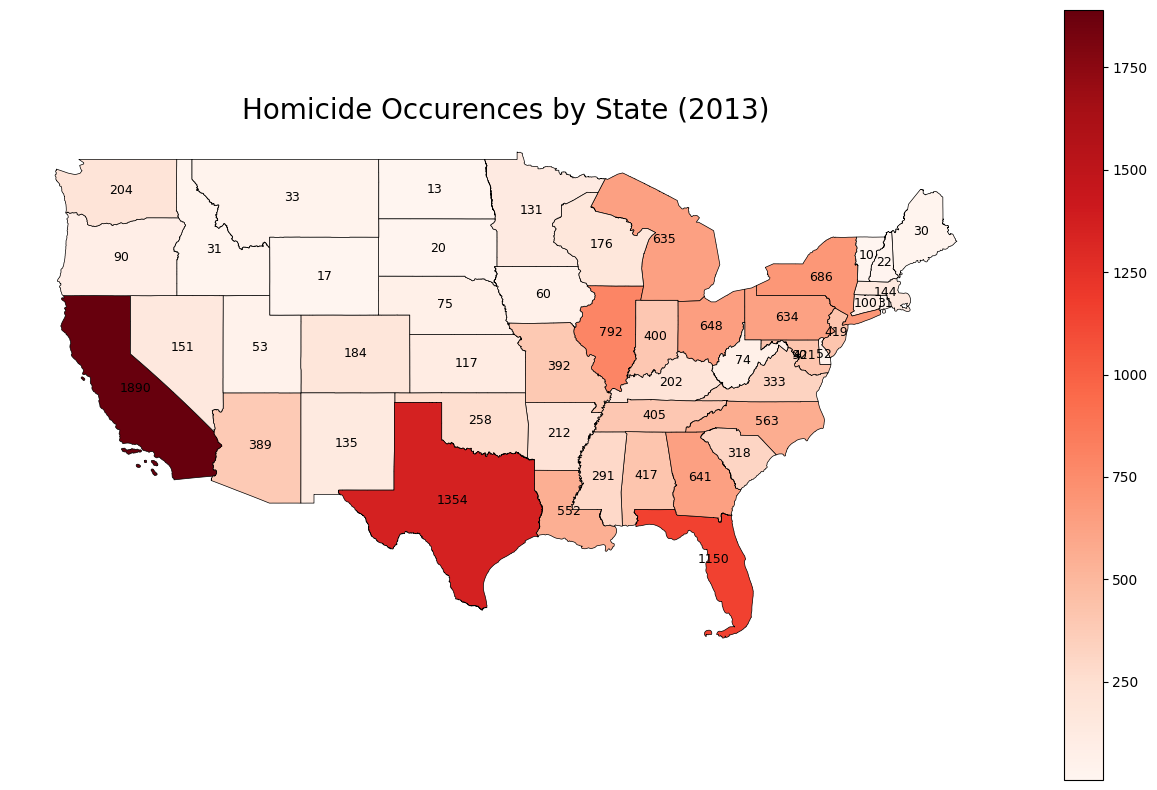

In [53]:
fig, ax = plt.subplots(figsize=(16, 10))

cont.plot(
    ax=ax,
    column="DEATHS",
    cmap="Reds",
    legend=True,
    edgecolor="black",
    linewidth=0.5
)

# AI was used to assist in adding the text to the plot (see citation below) [1]
for idx, row in cont.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    value = row["DEATHS"]

    ax.annotate(
        text=str(value),
        xy=(x, y),
        ha='center',
        va='center',
        fontsize=9,
        color='black'
    )

ax.set_title("Homicide Occurences by State (2013)", fontsize=20)
ax.set_axis_off()
plt.savefig("viz_files/Part1A.png", dpi=400, bbox_inches="tight")
plt.show()

[1] Microsoft Copilot GPT-5 Accessed on Feb 19, 2026 from  https://copilot.microsoft.com. Prompt chain:{'In a GeoPandas cont. plot, how do I display the data values on the map?'}

### Write-up

The data map that I created adheres to Wickham's Grammar of Graphics as follows:
* Data - number of homicides in 2013, with the states displayed.
* Aesthetic mapping - the number of deaths determine the color that the state is filled, as shown by the accompanying color. bar. The position of the states are determined by their coordinates, with the data provided by the US census.
* Geometry - the geometry of the states are drawn through the GeoPandas .plot() method.
* Scale - the color bar displays the magnitude of the data values on the map.
* Coordinate system - the data is mapped according to the state that it belongs to, also handled through the GeoPandas library

Additionally, inspiration for the design of this graphic came from the material provided in chapter 1 of Edward Tufte's book "The Visual Display of Quantitative Information". In this chapter, the author discusses how data maps provide a good way to display large amounts of information. Not only this, but they also allow for geographical trends to be readily observed. Although the example provided in the book breaks down the data by county, these facts are still relevant to my state-by-state breakdown of the United States homicide data. Initially I created a data map that displayed all death totals for the United States, but I figured that this may be overly dependent on the population density of each state. Upon this reflection, I decided to instead narrow this focus to solely homicide data. While it is still dependent on the number or residents in each state, it allows for potential trends to be observed.

## Part 1B

In [22]:
mi_death_data = death_data[death_data["STATE"] == "Michigan"]
mi_death_data_suic = mi_death_data[mi_death_data["CAUSE_NAME"] == "Suicide"]
mi_death_data_suic["DEATHS"] = pd.to_numeric(mi_death_data_suic["DEATHS"])

/tmp/ipykernel_1724055/3179476874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mi_death_data_suic["DEATHS"] = pd.to_numeric(mi_death_data_suic["DEATHS"])


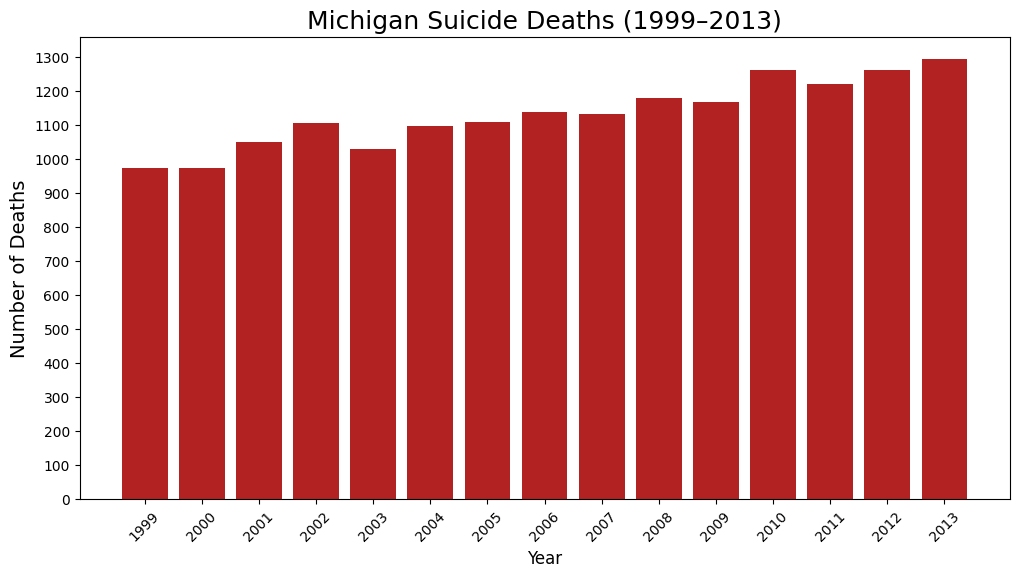

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(
    mi_death_data_suic["YEAR"],
    mi_death_data_suic["DEATHS"],
    color="firebrick",
)

ax.set_title("Michigan Suicide Deaths (1999–2013)", fontsize=18)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Deaths", fontsize=14)

ax.set_xticks(mi_death_data_suic["YEAR"])
ax.set_xticklabels(mi_death_data_suic["YEAR"], rotation=45)

ymax = round(int(mi_death_data_suic["DEATHS"].max()), -1)
step = 100
ticks = np.arange(0, ymax + step, 100)
ax.set_yticks(ticks)
ax.set_yticklabels([int(t) for t in ticks])

plt.savefig("viz_files/Part1B.png", dpi=400, bbox_inches="tight")
plt.show()

### Write-up

The vertical bar chart that I created adheres to Wickham's Grammar of Graphics as follows:
* Data - number of suicides in Michigan for each year from 1999-2013
* Aesthetic mapping - each position on the x-axis corresponds to a specific year, whereas the y-axis corresponds to the number of deaths
* Geometry - the geometry of the graphic are simple rectangles (bars) whose height reveals the number of deaths
* Scale - the x-axis utilizes a categorical scale for the years, while the y-axis uses a linear scale for the death counts
* Coordinate system - the data is simply mapped in a x,y rectangular coordinate system

Furthermore, the bar chart was chosen to visualize this data to achieve graphical excellence according to the standards that Edward Tufte lays out in chapter 1 of his book "The Visual Display of Quantitative Information". The author states that one should strive to show the data without distorting it and to allow for easy comparison of different pieces of data (among other things). A bar chart clearly allows the viewer to observe the trends taking place in the data, doing so in a quick manner that maintains the integrity of the data.

## Part 2

In [32]:
beers = beers.drop(columns=["Unnamed: 0"])
breweries = breweries.drop(columns=["Unnamed: 0"])

In [33]:
breweries["brewery_id"] = breweries.index
bbs = beers.merge(breweries, left_on="brewery_id", right_on="brewery_id", how="left")
bbs = bbs.rename(columns={
    "name_x": "beer_name",
    "name_y": "brewery_name"
})
bbs["state"] = bbs["state"].astype("string")
bbs["city"] = bbs["city"].astype("string")
bbs["beer_name"] = bbs["beer_name"].astype("string")
bbs["style"] = bbs["style"].astype("string")
bbs["brewery_name"] = bbs["brewery_name"].astype("string")
bbs.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [35]:
# Exploratory Data Analysis
bbs.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [36]:
mi_bbs = bbs[bbs["state"] == " MI"]

In [37]:
mi_bbs.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
131,0.060,55.0,413,Sky High Rye,American Pale Ale (APA),541,12.0,Arcadia Brewing Company,Battle Creek,MI
132,0.062,17.0,390,Whitsun,American Pale Wheat Ale,541,12.0,Arcadia Brewing Company,Battle Creek,MI
150,0.075,115.0,2503,Hop A-Peel,American Double / Imperial IPA,72,16.0,Atwater Brewery,Detroit,MI
151,0.055,12.0,2502,Vanilla Java Porter,American Porter,72,16.0,Atwater Brewery,Detroit,MI
152,0.052,NaN,2495,Michelada,Fruit / Vegetable Beer,72,16.0,Atwater Brewery,Detroit,MI


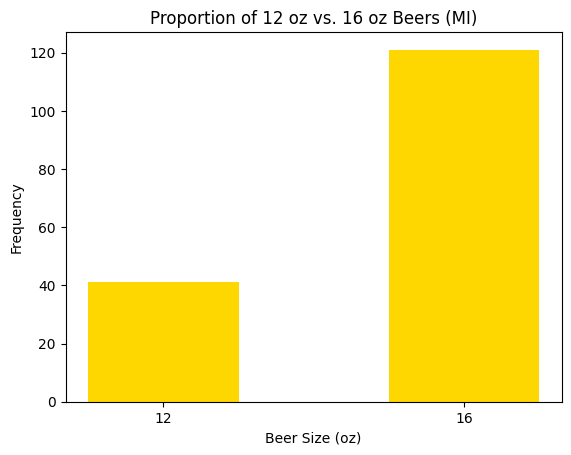

In [56]:
oz_12 = (mi_bbs["ounces"] == 12.0).sum()
oz_16 = (mi_bbs["ounces"] == 16.0).sum()
plt.bar(["12", "16"], [oz_12, oz_16], width=0.5, color="gold")
plt.xlabel("Beer Size (oz)")
plt.ylabel("Frequency")
plt.title("Proportion of 12 oz vs. 16 oz Beers (MI)")
plt.savefig("viz_files/Part2A.png", dpi=400, bbox_inches="tight")
plt.show()

In [40]:
brews_by_city_us = {}
for _, row in bbs.iterrows():
    if row["city"] not in brews_by_city_us:
        brews_by_city_us[row["city"]] = 1
    else:
        brews_by_city_us[row["city"]] += 1

df = pd.DataFrame.from_dict(brews_by_city_us, orient="index", columns=["count"])
df = df.reset_index().rename(columns={"index": "city"})

top_10 = df.sort_values("count", ascending=False).head(10)

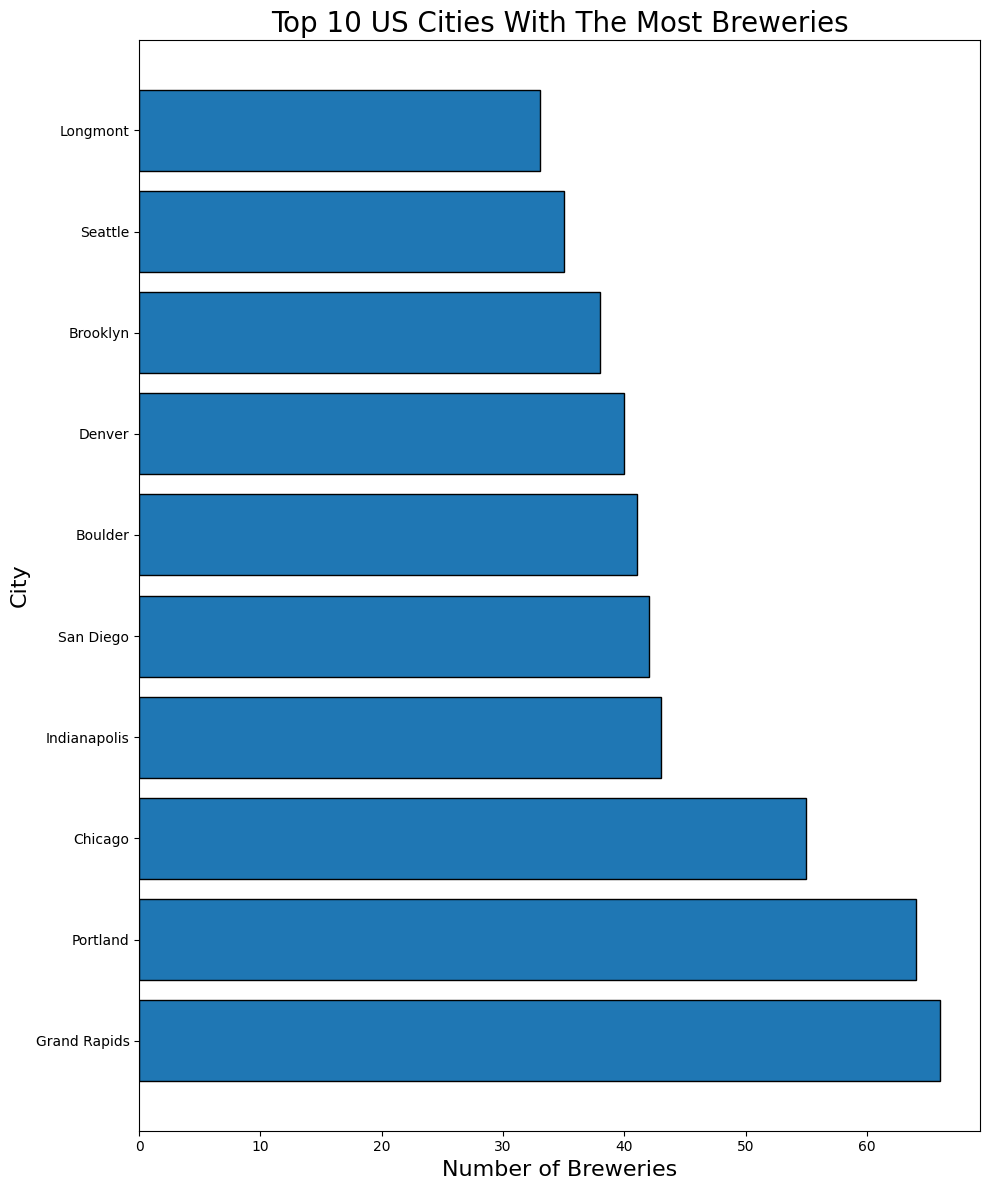

In [57]:
plt.figure(figsize=(10, 12))
plt.barh(top_10["city"], top_10["count"], edgecolor="black")

plt.xlabel("Number of Breweries", fontsize=16)
plt.ylabel("City", fontsize=16)
plt.title("Top 10 US Cities With The Most Breweries", fontsize=20)
plt.tight_layout()
plt.savefig("viz_files/Part2B.png", dpi=400, bbox_inches="tight")
plt.show()

In [42]:
for column in bbs.columns:
    print(column, bbs[column].isna().sum())

abv 62
ibu 1005
id 0
beer_name 0
style 5
brewery_id 0
ounces 0
brewery_name 0
city 0
state 0


In [43]:
bbs_nona = bbs.dropna(subset=["style", "abv", "ounces"])

In [44]:
bbs_nona.head()

,abv,ibu,id,beer_name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [45]:
top10_set = set(top_10["city"])

In [46]:
abv_oz_top10 = {}
for _, row in bbs_nona.iterrows():
    city = row["city"]
    if city in top10_set:
        abv = row["abv"]
        oz = row["ounces"]
    
        if city not in abv_oz_top10:
            abv_oz_top10[city] = {"abv": [abv], "oz": [oz]}
        else:
            abv_oz_top10[city]["abv"].append(abv)
            abv_oz_top10[city]["oz"].append(oz)

In [47]:
avg_abv_oz_top10 = {}
for k, v in abv_oz_top10.items():
    avg_abv = np.mean(abv_oz_top10[k]["abv"])
    avg_oz = np.mean(abv_oz_top10[k]["oz"])
    avg_abv_oz_top10[k] = {"avg_abv": round(avg_abv, 4), "avg_oz": round(avg_oz, 4)}

In [48]:
df_top10 = pd.DataFrame(avg_abv_oz_top10).T
df_top10 = df_top10.reset_index().rename(columns={"index": "city"})
df_top10.head()

,city,avg_abv,avg_oz
0,Portland,0.0528,14.4375
1,Boulder,0.0680,14.5951
2,San Diego,0.0618,16.6667
3,Indianapolis,0.0683,15.9024
4,Denver,0.0632,12.5000


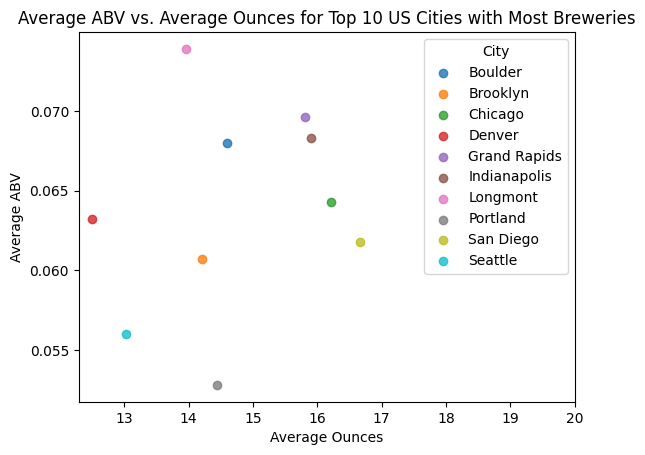

In [58]:
for city, group in df_top10.groupby("city"):
    plt.scatter(
        group["avg_oz"],
        group["avg_abv"],
        label=city,
        alpha=0.8
    )
plt.xlim(right=20)
plt.legend(title="City")
plt.xlabel("Average Ounces")
plt.ylabel("Average ABV")
plt.title("Average ABV vs. Average Ounces for Top 10 US Cities with Most Breweries")
plt.savefig("viz_files/Part2C.png", dpi=400, bbox_inches="tight")
plt.show()

### Write-up

1. As shown by the visualizations that were created above, I was curious about trends that take place geographically for beer consumption and brewery information. In the first bar chart, I was interested in exploring the proportion of 12 oz. vs. 16 oz. beers that were consumed in Michigan, and to my surprise 16 oz. drastically outweighed 12 oz. consumption. For the second plot, I wanted to know about the distribution of breweries throughout the United States, more specifically what cities had the most. I was shocked to find out that Grand Rapids leads the nation in quantity of breweries (at least at the time that this data was compiled). The third visualization follows closely to the second, and I was intrigued if there was any correlation between the ounces and ABV. Because of the structure of the data set, I chose to narrow this display to only the top 10 cities with the most breweries.
2. In the first visualization, I learned that a lot more beer is provided in 16 ounces than 12 ounces (in Michigan), and the gap was quite significant. As mentioned above, in the second figure I discovered that our own state has the city (Grand Rapids) with the most amount of breweries. Based on advertising that I see on TV and social media, I would have assumed a somewhere in Colorado would lead this figure. For the third graphic, I wanted to investigate the relationship between the amount of ounces and ABV content, and as I hypothesized, the relationship is mostly linearly proportional.
3. The aspect of the data that I would like to explore further would be in revenue/sales of each beer/brewery listed in the data set. I would then want to create a data map and observe geographical trends to see how this is distributed throughout the Untied States.   

## Part 3

In [50]:
sty_abv_oz = {}
for _, row in bbs_nona.iterrows():
    style = row["style"]
    abv = row["abv"]
    oz = row["ounces"]

    if style not in sty_abv_oz:
        sty_abv_oz[style] = {"abv": [abv], "oz": [oz]}
    else:
        sty_abv_oz[style]["abv"].append(abv)
        sty_abv_oz[style]["oz"].append(oz)

In [51]:
avg_sty_abv_oz = {}
for k, v in sty_abv_oz.items():
    avg_abv = np.mean(sty_abv_oz[k]["abv"])
    avg_oz = np.mean(sty_abv_oz[k]["oz"])
    avg_sty_abv_oz[k] = {"avg_abv": round(avg_abv, 4), "avg_oz": round(avg_oz, 4)}

In [52]:
df = pd.DataFrame(avg_sty_abv_oz).T
df = df.reset_index().rename(columns={"index": "style"})
df.head()

,style,avg_abv,avg_oz
0,American Pale Lager,0.0512,13.2973
1,American Pale Ale (APA),0.0546,13.1950
2,American IPA,0.0645,13.5885
3,American Double / Imperial IPA,0.0874,14.1670
4,Oatmeal Stout,0.0597,14.0000


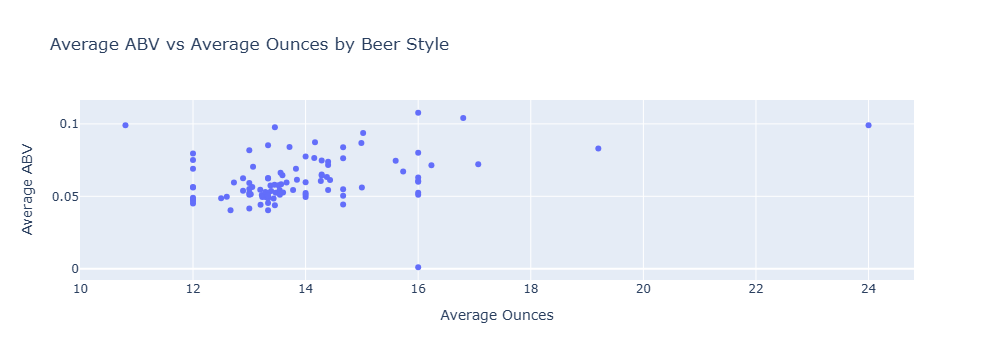

In [60]:
fig = px.scatter(
    df,
    x="avg_oz",
    y="avg_abv",
    hover_name="style",
    labels={
        "avg_oz": "Average Ounces",
        "avg_abv": "Average ABV"
    },
    title="Average ABV vs Average Ounces by Beer Style"
)

fig.write_html("viz_files/part3.html", include_plotlyjs="cdn")
fig.show()

In [57]:
mi_death = death_data[death_data["STATE"] == "Michigan"]
mi_death_2013 = mi_death[mi_death["YEAR"] == 2013]

mi_death_2013["DEATHS"] = pd.to_numeric(mi_death_2013["DEATHS"])

mi_death_2013_all = mi_death_2013[mi_death_2013["CAUSE_NAME"] == "All Causes"]
mi_death_2013_cat = mi_death_2013[mi_death_2013["CAUSE_NAME"] != "All Causes"]

/tmp/ipykernel_3396298/4063059930.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



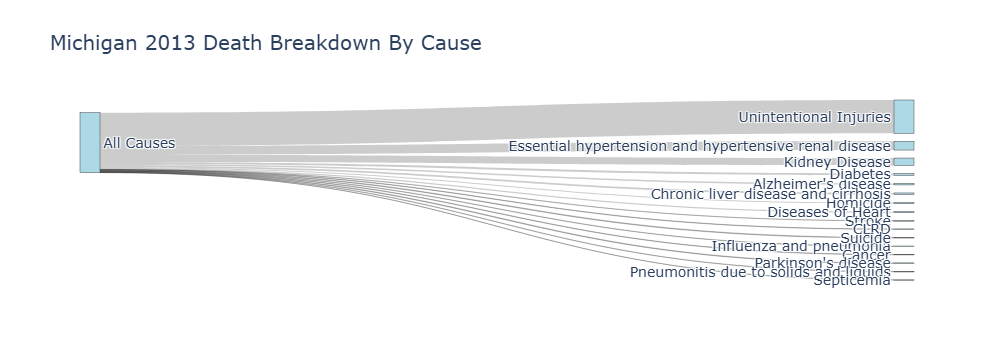

In [88]:
# Define nodes
labels = list(mi_death_2013_all["CAUSE_NAME"]) + list(mi_death_2013_cat["CAUSE_NAME"])

# Define flows
source = [0] * (len(labels) - 1)   # from "Input"
target = list(range(1,len(labels)))   # to "A" and "B"
value  = list(mi_death_2013_all["DEATHS"]) + list(mi_death_2013_cat["DEATHS"])   # flow magnitudes

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        label=labels,
        color="lightblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    )
)])

fig.update_layout(title_text="Michigan 2013 Death Breakdown By Cause", font_size=14)
fig.show()


### Write-up

The interactive scatter plot that I created adheres to Wickham's Grammar of Graphics as follows:
* Data - average beer size vs. average ABV, by style of beer
* Aesthetic mapping - the x-axis corresponds to the average ounces, y-axis to the average ABV, and the hover label provides the style of beer
* Geometry - the geometry of the graphic are simple circles (scatter marks) where each point represents one style of beer
* Scale - both the x and y axes implement a linear scale
* Coordinate system - the data is simply mapped in a x,y rectangular coordinate system

Moreover, the scatter plot was chosen to clearly show the linear relationship in the data. According to chapter 1 of Edward Tufte's book "The Visual Display of Quantitative Information", data should be shown clearly, reveal patterns, and avoid distortion. This plot easily allows viewers to do this, while also providing an interactive aspect to provide them with the beer style when they hover over the data point. This is much more effective than a normal scatter plot, because if you wanted to convey this information in that manner it would be very inefficient and cluttered. Because there are 99 different styles, neither color coding the data points or placing text near the markers would be an appropriate way of conveying this information.